In [3]:
pip install pandasql


  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26818 sha256=7b4af3e257e3132a8f2c00b8d836be8a9f6815030ec12e8eb5904e3b83c04946
  Stored in directory: c:\users\nsc\appdata\local\pip\cache\wheels\ed\8f\46\a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [1]:
import pandas as pd
from pandasql import sqldf

dataset = pd.read_csv('C:/Users/NSC/Desktop/coursera/sport/athlete_events.csv')

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [2]:
df=pd.DataFrame(dataset)
df.head()

#we can see that our DataSet have numeric & string datatypes and both have some missing values 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [16]:
sql("select max(year),min(year)  from df")

,max(year),min(year)
0,2016,1896


In [3]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [10]:
df.select_dtypes(include='number').columns

Index(['ID', 'Age', 'Height', 'Weight', 'Year'], dtype='object')

In [11]:
df.select_dtypes(include='number').head()

,ID,Age,Height,Weight,Year
0,1,24.0,180.0,80.0,1992
1,2,23.0,170.0,60.0,2012
2,3,24.0,NaN,NaN,1920
3,4,34.0,NaN,NaN,1900
4,5,21.0,185.0,82.0,1988


In [12]:
df.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [13]:
df.select_dtypes(include='object').head()

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992 Summer,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,China,CHN,2012 Summer,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


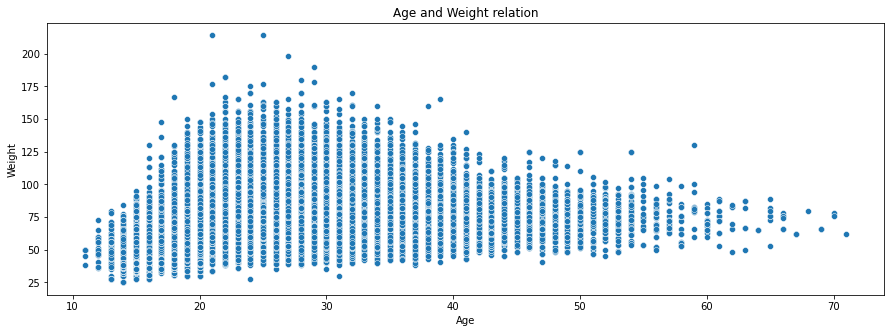

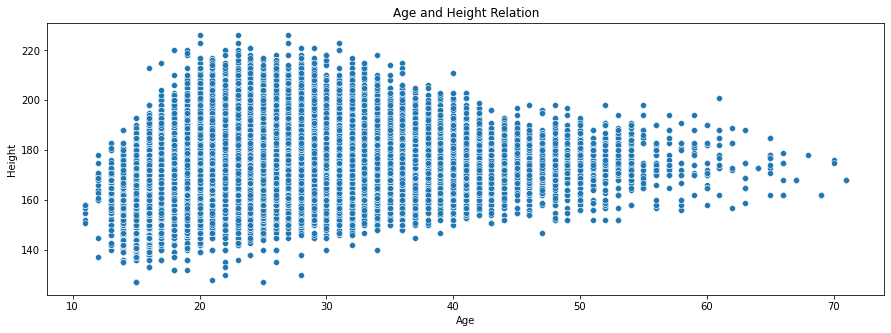

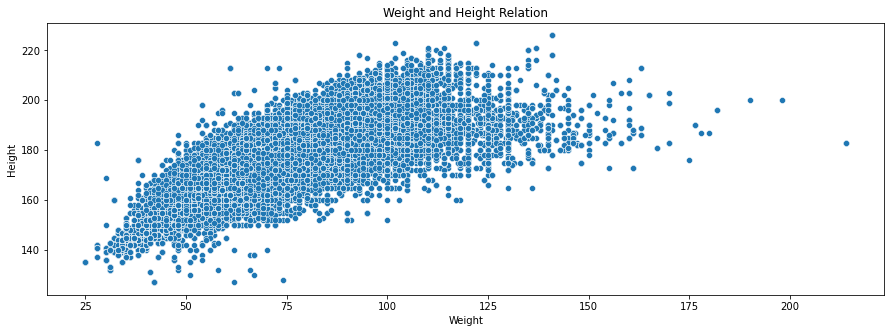

In [4]:
#hypothesis about null values : for medals 'null-values' were given to athletes ranked bellow Bronz
#so it's not a typist error

#lets see about the rest of missed values                    
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Age',y='Weight')
plt.title('Age and Weight relation') 
plt.xlabel('Age') 
plt.ylabel('Weight') 
plt.show()

plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Age',y='Height')
plt.title('Age and Height Relation') 
plt.xlabel('Age') 
plt.ylabel('Height') 
plt.show()

plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Weight',y='Height')
plt.title('Weight and Height Relation') 
plt.xlabel('Weight') 
plt.ylabel('Height') 
plt.show()



In [8]:
# Now Let's see how athletes data is distributed
sql = lambda q:sqldf(q,globals())

###   SELECT the mean of (height , weight and age) for each country excluding null values
### order by maximum height mean

sql("select 
    team,
    avg(height),
    avg(weight),
    avg(age) 
    from df 
    where 
    (height is not null
     and weight is not null 
     and age is not null)
    group by team
    order by avg(height) DESC 
    limit 10 
    ")
    # The sql() Code above will work only if it's on a single line  this is just for explanation 

## With the same principle we can sort the teams according to the maximum (weight and/or age) average


,Team,avg(height),avg(weight),avg(age)
0,Puerto Rico-1,196.000000,96.000000,30.500000
1,England-1,193.000000,82.500000,26.227273
2,France/Great Britain,191.000000,NaN,33.000000
3,Nadine,190.000000,75.000000,34.000000
4,Ireland-1,189.666667,97.666667,29.600000
5,Serbia-2,189.000000,83.000000,25.500000
6,Sydney Rowing Club,188.500000,85.000000,26.555556
7,Puerto Rico-2,188.000000,98.000000,27.500000
8,New York Athletic Club-4,188.000000,91.000000,32.750000
9,Salamander,187.666667,93.000000,30.000000


In [66]:
#We can see that Puerto Rico atheletes are  more likely to be taller countries than other atheletes from other 
# Let's see the spliting point in Age data (Median)

sql("SELECT age as median_age FROM df  ORDER BY age LIMIT 1 OFFSET (SELECT COUNT(*) FROM df) / 2")


,median_age
0,24.0


In [69]:
# Let's see the most frequent age range in this DataSet (Mode)
sql("SELECT age,COUNT(*) as count FROM df GROUP BY age ORDER BY COUNT(*) DESC LIMIT 5")


,Age,count
0,23.0,21875
1,24.0,21720
2,22.0,20814
3,25.0,19707
4,21.0,19164


In [15]:
# that above dectates that:
#    there is a big probabilty for a 23 Yo athelete to have a medal,
#    lets verify the claim 
sql("SELECT age,COUNT(*) medal_count FROM df where medal is not null  GROUP BY age ORDER BY count(*) DESC limit 10")


,Age,medal_count
0,23.0,3395
1,24.0,3289
2,22.0,3159
3,25.0,3124
4,26.0,2924
5,27.0,2690
6,21.0,2684
7,28.0,2335
8,20.0,2004
9,29.0,1941


In [9]:
# Now let's see the number of medals for each year

sql("SELECT year,COUNT(*) medal_count FROM df where medal is not null GROUP BY year ORDER BY count(*) DESC limit 10")



,Year,medal_count
0,2008,2048
1,1992,2030
2,2016,2023
3,2000,2004
4,2004,2001
5,2012,1941
6,1988,1845
7,1996,1842
8,1984,1698
9,1980,1602


In [11]:
# We can assume that this is
#an observation of (The evolution of the athletic body over the years if each person, is a life time athlete.) 
#Which is very likely.
# for age weight and height let give it a look

sql("select count(*) as 'samples with null values',team from df where Weight is null or Height is null or Age is null group by Team order by count(*) DESC limit 10;")



,samples with null values,Team
0,4181,France
1,4133,United States
2,3905,Great Britain
3,2827,Italy
4,2801,Sweden
5,2329,Germany
6,2034,Netherlands
7,1944,Belgium
8,1926,Switzerland
9,1882,Hungary


In [16]:

sql("select age ,name from df order by age DESC limit 10;")
#it's wierd!! need some research about those persons

,Age,Name
0,97.0,John Quincy Adams Ward
1,96.0,Winslow Homer
2,88.0,Thomas Cowperthwait Eakins
3,88.0,Thomas Cowperthwait Eakins
4,88.0,Thomas Cowperthwait Eakins
5,84.0,George Denholm Armour
6,81.0,Robert Tait McKenzie
7,81.0,Louis Tauzin
8,80.0,Max Liebermann
9,80.0,Max Liebermann


In [21]:
sql("select name,min(age) as age,medal from df")
# i googled this man he is  a legend

,Name,age,Medal
0,Dimitrios Loundras,10.0,Bronze


In [22]:
sql("select count(medal)as 'total medals',team as 'country' from df  group by Team order by count(medal) DESC limit 10;")

,total medals,country
0,5219,United States
1,2451,Soviet Union
2,1984,Germany
3,1673,Great Britain
4,1550,France
5,1527,Italy
6,1434,Sweden
7,1306,Australia
8,1243,Canada
9,1127,Hungary


In [23]:
sql("select count(medal)as 'total medals',name,team as ' Out of' from df  group by name order by count(medal) DESC limit 10;")

,total medals,Name,Out of
0,28,"Michael Fred Phelps, II",United States
1,18,Larysa Semenivna Latynina (Diriy-),Soviet Union
2,15,Nikolay Yefimovich Andrianov,Soviet Union
3,13,Takashi Ono,Japan
4,13,Ole Einar Bjrndalen,Norway
5,13,Edoardo Mangiarotti,Italy
6,13,Borys Anfiyanovych Shakhlin,Soviet Union
7,12,Sawao Kato,Japan
8,12,Ryan Steven Lochte,United States
9,12,Paavo Johannes Nurmi,Finland


In [24]:
sql("select count(medal) as 'total medals' from df")

#we don't have do add the where clause to exclude the 'NAN-values' it's automatically handled


,total medals
0,39783


In [25]:
#Thats a huge number of medals. 
# in gold medals there are about 6 Grams of pure GOLD  let's say that a gram worth staticly 70$ 6gm=>420$
#Let's 🔨Mine🔨 the total amount of the gold in this DataSet

In [26]:
sql("select count(medal) as 'pure Gold 6 Grams ',count(medal)*70 as '$' from df where medal ='Gold'")

,pure Gold 6 Grams,$
0,13372,936040


In [27]:
#we can do the same to count the amount and cost of pure silver and bronze 

In [33]:
# let's see where the Olympic is hosted most of the times
sql("select count(games) as 'Olympic hosting ',city from df  group by city order by count(games) DESC limit 10;")

,Olympic hosting,City
0,22426,London
1,15556,Athina
2,13821,Sydney
3,13780,Atlanta
4,13688,Rio de Janeiro
5,13602,Beijing
6,12977,Barcelona
7,12423,Los Angeles
8,12037,Seoul
9,10304,Munich


In [ ]:
####### https://www.facebook.com/zadi.salah you  #######